In [1]:
import sys
print(sys.executable) 

C:\Users\tryst\anaconda3\python.exe


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

#networkx graph computing library
import networkx as nx

#opensourcemap networkx geopandas library
import osmnx as ox

# to create Point objects that can be used with the GeoDataFrame.contains(Point) boolean method
from shapely.geometry import Point

#load the graph with nx.read_graphml
graphml_path = '../ny_dataset/manhatten.graphml'
G = nx.read_graphml(graphml_path)

# The Node Connectivity describes the number of nodes we must delete from the Graph G until it is disconnected.

In [2]:
# turn graph into simple graph so self loops out and becomes undirected
# simple graphs tend to be easier to work with

G_simple = nx.Graph(G)
G_simple2 = nx.Graph(G)


nx.node_connectivity(G_simple)

1

In [159]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

# Algebraic connectivity is another test for robustness, if less than node connectivity, and greater than 0, this is a positive indicator 

In [ ]:
nx.algebraic_connectivity(G_simple)

# The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

# Fraction of all shortest paths in the network passing through the edge/ node for which it is calculated

In [ ]:
between =  nx.betweenness_centrality(G_simple)

In [3]:
#taken from. https://github.com/gboeing/osmnx
def great_circle_vec(lat1, lng1, lat2, lng2, earth_radius=6371009):

    phi1 = np.deg2rad(90 - lat1)

    phi2 = np.deg2rad(90 - lat2)

    theta1 = np.deg2rad(lng1)
    theta2 = np.deg2rad(lng2)

    cos = (np.sin(phi1) * np.sin(phi2) * np.cos(theta1 - theta2) + np.cos(phi1) * np.cos(phi2))
    arc = np.arccos(cos)

    distance = arc * earth_radius
   
    return distance


def get_nearest_node(G, point, return_dist=False):

    coords = np.array([[node, data['x'], data['y']] for node, data in G.nodes(data=True)])
    df = pd.DataFrame(coords, columns=['node', 'x', 'y']).set_index('node')
    df['reference_y'] = point[0]
    df['reference_x'] = point[1]

    distances = great_circle_vec(lat1=df['reference_y'],
                                 lng1=df['reference_x'],
                                 lat2=df['x'].astype('float'),
                                 lng2=df['y'].astype('float'))
  
    nearest_node = int(distances.idxmin())
  
    if return_dist:
        return nearest_node, distances.loc[nearest_node]
    else:
        return nearest_node

In [4]:
# taken from https://www.kaggle.com/usui113yst/basic-network-analysis-tutorial?select=manhatten.graphml

#load the training data
train = pd.read_csv('../ny_dataset/train.csv')


#go through the dataset and calculate the shortest path
for index, row in train[24:25].iterrows():

    pick_point = ( row['pickup_longitude'],row['pickup_latitude'])
    drop_point = ( row['dropoff_longitude'],row['dropoff_latitude'])
    
    pick_node = get_nearest_node(G, pick_point)
    drop_node = get_nearest_node(G, drop_point)
   
    try:
        route = nx.shortest_path(G, str(pick_node), str(drop_node))
        #plot the shortest path on the graph
        #fig, ax = ox.plot_graph_route(G, route,fig_height=15, node_size=1)
        print("Shortest Path:")
        print(route)
        
    except:
        print("Some Error")
        #handle error
        pass
    
    #the corresponding node betweenness scores for each edge in the shortest path
    #print()
    #print("Betweenness Centrality for each node on the path")
    #node_bet = []
    #for edge in route:
    #    node_bet.append(between[edge])
    #print(node_bet)

Shortest Path:
['42448238', '42435514', '42450028', '42447132', '42458766', '596776132', '42446036', '42449187', '42433927', '42435310', '42443353', '42442480', '42434160', '1061531637', '1061531810', '1061531768', '1061531682', '1061531731', '42428695', '42431067', '42441535', '595314125', '42425348', '2029349908', '595314119', '42441382', '42441310', '5004570627', '5004570651', '42452276', '5004570644', '5004570630', '42428814', '561035335', '627905367', '1506445762', '1504153604', '561035338', '1506599378', '1506599377', '561035342', '561035343', '561035344', '561035345', '561035346', '561035347', '42428880', '42434105', '42424679', '42424698', '587934347', '42424823', '60928432', '60927650', '60928040', '60916829', '595729853', '374482644', '374472690', '42441000', '42441007', '42441009', '595729838', '42429215', '42429216', '42429217', '42429220', '42429222', '42429226', '42429228', '42429231', '42429236', '42429242', '42429244', '42446231', '42444880', '42446228']


In [5]:
# unable to use the graphml file, unsure how to load it, not much information on loading from graphml
# so going to use the OSMNX package outline of manhattan that contains the crossroads datapoints

G_oms = ox.graph.graph_from_place('Manhattan, New York City', network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, which_result=None, buffer_dist=None, clean_periphery=True, custom_filter=None)

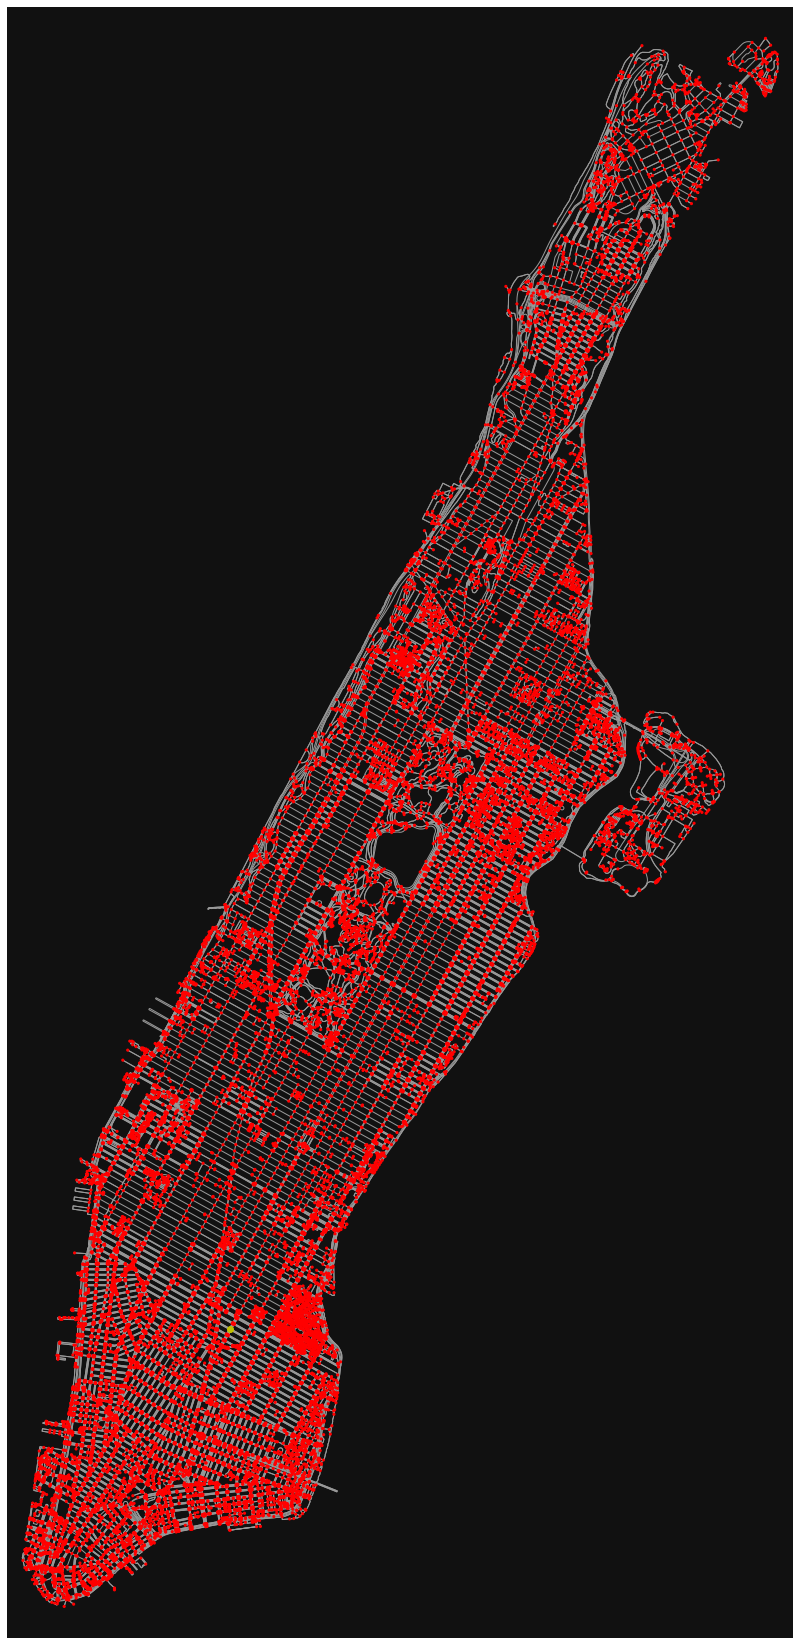

In [6]:
# testing the plotting of one single lat/lon point on the map

fig, ax = ox.plot.plot_graph(G_oms, figsize=(30, 30), node_color = 'r', node_size = 10, show=False, close=False)
ax.scatter(-73.9881286621094, 40.7320289611816, c='y')
plt.show()

In [7]:
ny_taxi_train = pd.read_csv('../ny_dataset/train.csv')

In [8]:
ny_taxi_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [8]:
pickup_longs = ny_taxi_train['pickup_longitude']
pickup_lats = ny_taxi_train['pickup_latitude']
dropoff_longs = ny_taxi_train['dropoff_longitude']
dropoff_lats = ny_taxi_train['dropoff_latitude']

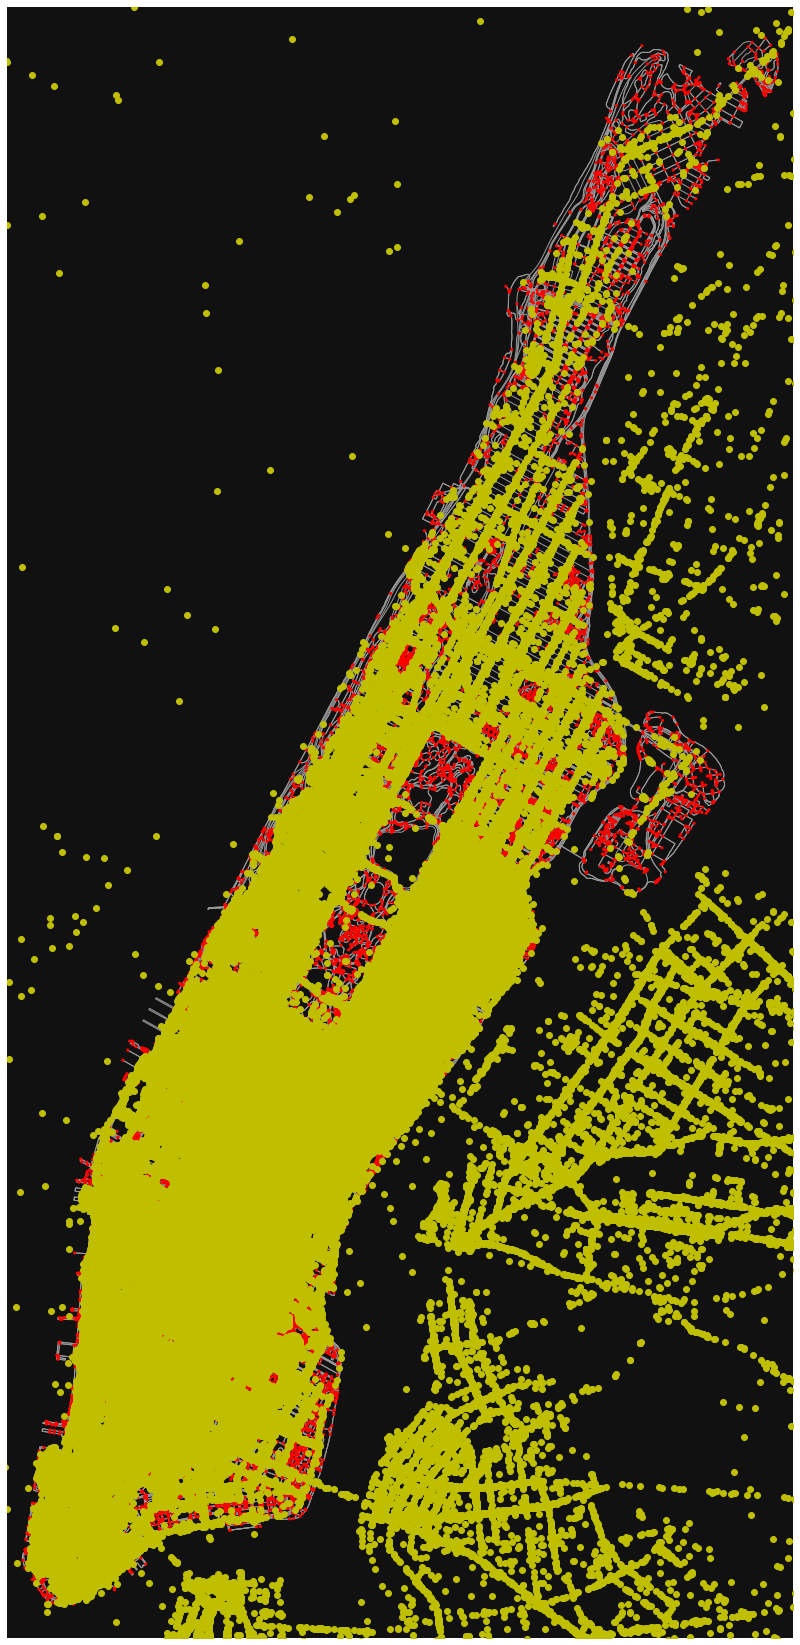

In [9]:
fig, ax = ox.plot.plot_graph(G_oms, figsize=(30, 30), node_color = 'r', node_size = 10, show=False, close=False)
ax.scatter(pickup_longs, pickup_lats, c='y')
plt.show()

# I want to clean the data to work with only points within Manhattan as the entire city of NY is too large

In [10]:
# below gets outline of the manhattan area that has a built-in contains() method to check if a point is inside this boundary

geocoded_man = ox.geocoder.geocode_to_gdf('Manhattan, New York City')

In [11]:
type(geocoded_man)

geopandas.geodataframe.GeoDataFrame

In [12]:
point = Point(pickup_longs[0], pickup_lats[0])

In [13]:
geocoded_man.contains(point)

0    True
dtype: bool

So I can now check to see if a point is within the manhattan boundary, cool!

In [14]:
ny_taxi_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [15]:
geocoded_man

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"MULTIPOLYGON (((-74.04722 40.69086, -74.04722 ...",40.880449,40.683941,-73.906159,-74.047222,312415317,relation,8398124,40.789624,-73.959894,"Manhattan, New York County, New York, United S...",boundary,administrative,0.985439


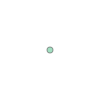

In [16]:
ex_point = Point((1, 2))
ex_point

In [26]:
from IPython.display import clear_output

train_manhattan_small = ny_taxi_train.sample(10000).sort_index(axis=0)

contained_in_man = []

done = 0
N = len(train_manhattan_small)

for index, row in train_manhattan_small.iterrows():
    pickup_point = Point(row['pickup_longitude'], row['pickup_latitude'])
    dropoff_point = Point(row['dropoff_longitude'], row['dropoff_latitude'])
    contained_in_man.append(geocoded_man.contains(pickup_point) & geocoded_man.contains(dropoff_point))
    clear_output(wait=True)
    done += 1
    print(f"PERCENT DONE: {(done/N)*100}%")

PERCENT DONE: 100.0%


In [25]:
train_manhattan_small = ny_taxi_train.sample(10000).sort_index(axis=0)
train_manhattan_small

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
44,id3326491,2,2016-02-12 07:41:56,2016-02-12 07:51:15,1,-73.979645,40.739632,-73.994728,40.723495,N,559
316,id1285469,2,2016-02-23 09:19:37,2016-02-23 09:39:35,1,-74.016479,40.715408,-74.012756,40.706612,N,1198
431,id3355874,1,2016-02-04 11:24:26,2016-02-04 11:42:51,1,-73.984375,40.769688,-73.954071,40.764027,N,1105
649,id0153673,2,2016-05-25 08:00:03,2016-05-25 08:10:07,6,-74.007858,40.705296,-74.013481,40.715263,N,604
879,id2624983,2,2016-03-21 15:11:05,2016-03-21 15:16:51,6,-73.989502,40.756447,-73.980042,40.766331,N,346
...,...,...,...,...,...,...,...,...,...,...,...
1457983,id3415418,2,2016-02-19 02:02:03,2016-02-19 02:07:46,4,-73.988518,40.735153,-73.977905,40.729446,N,343
1458054,id3182192,1,2016-05-07 16:30:10,2016-05-07 16:33:01,1,-73.949585,40.780739,-73.955254,40.780071,N,171
1458085,id1326136,2,2016-05-21 12:07:11,2016-05-21 12:07:28,1,-73.978935,40.762463,-73.977654,40.762012,N,17
1458261,id0981774,2,2016-02-05 15:27:37,2016-02-05 15:37:17,5,-73.982368,40.768311,-73.976830,40.785240,N,580


In [27]:
filtered = train_manhattan_small[np.array(contained_in_man)]

In [29]:
filtered.shape

(8453, 11)

In [32]:
def find_shortest_routes(dataframe):
    """
    Parameters:
        dataframe: trip df with pickup and dropoff locations
    Returns:  
      shortest_routes: list of OSM graph nodes that constitute shortest paths from pickup to dropoff locations
      
    Extra notes:
        Added a percentage calculator since large datasets take a long while to process this information
    """
    shortest_routes = []
    finished = 0
    row_count = len(train_manhattan_small)
    for index, row in train_manhattan_small.iterrows():
        pick_point = (row['pickup_longitude'], row['pickup_latitude'])
        drop_point = (row['dropoff_longitude'], row['dropoff_latitude'])

        #below return the node id from G_oms of closest node
        pick_node = ox.distance.nearest_nodes(G_oms, pick_point[0], pick_point[1], return_dist=False)
        drop_node = ox.distance.nearest_nodes(G_oms, drop_point[0], drop_point[1], return_dist=False)

        try:
            route = ox.distance.shortest_path(G_oms, pick_node, drop_node)
            shortest_routes.append(route)
                #plot the shortest path on the graph
                #fig, ax = ox.plot_graph_route(G, route,fig_height=15, node_size=1)
        except:
            pass

        finished += 1

        clear_output(wait=True)
        print("PERCENTAGE DONE: ", (finished/row_count)*100, "%")
            
    return shortest_routes

In [33]:
shortest_routes_small = find_shortest_routes(train_manhattan_small)

PERCENTAGE DONE:  100.0 %


In [34]:
train_manhattan_small['pp_to_dp'] = shortest_routes_small
train_manhattan_small['len_pp_to_dp'] = train_manhattan_small['pp_to_dp'].apply(lambda row: 0 if row is None else len(row))

In [35]:
# calculating path similarities, going to see if I can do an overlap of paths
sample_indices = []
for index, row in train_manhattan_small.iterrows():
    sample_indices.append(index)

In [140]:
import math

def construct_overlap_matrix(size, df):
    """
    parameters:
        size(int): size of dataframe
        df(Pandas.DataFrame)
        
    returns:
        matrix(size x size): matrix with tuple values of (num_shared, average) at matrix[i][j]
            num_shared(int): count of intersecting nodes between row i and row j of df
            average: fractional average of shared nodes with respect to the lengs of the two row's paths
            
        overlaps(list(ints)): list of all the averages for visualization purposes
     """
    
    matrix = [[0]*size for row in range(size)]
    overlaps = []

    finished = 0

    for row_ind in range(size):
        for col_ind in range(size):
            if row_ind != col_ind:
                path1 = df['pp_to_dp'][sample_indices[row_ind]]
                path2 = df['pp_to_dp'][sample_indices[col_ind]]

                if path1 is None or path2 is None:
                    average = 0
                    overlaps.append(0)
                    
                else:
                    path1_len = len(path1)
                    path2_len = len(path2)

                    shared_nodes = [node for node in path1 if node in path2]

                    num_shared = len(shared_nodes)

                    path1_overlap = (num_shared/path1_len)*100
                    path2_overlap = (num_shared/path2_len)*100
                    
                    average = 2*num_shared/(path1_len + path2_len)
                    
                    overlaps.append(round(average, 6))

                matrix[row_ind][col_ind] = (num_shared, average)

            finished += 1
            clear_output(wait=True)
            print("PERCENTAGE DONE: ", (finished/(size**2))*100, "%")
            
    return matrix, overlaps

In [141]:
matrix, overlaps = construct_overlap_matrix(size=1000, df=train_manhattan_small)

PERCENTAGE DONE:  100.0 %


In [115]:
pd.DataFrame(matrix)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(6, 0.0967741935483871)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(1, 0.009523809523809525)","(0, 0.0)","(1, 0.016)","(1, 0.0106951871657754)","(1, 0.015037593984962405)","(0, 0.0)","(0, 0.0)","(0, 0.0)"
1,"(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.021052631578947368)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.02197802197802198)","(0, 0.0)","(13, 0.34210526315789475)"
2,"(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)"
3,"(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.05128205128205128)","(0, 0.0)","(1, 0.0425531914893617)","(0, 0.0)","(1, 0.03389830508474576)","(15, 0.6)"
4,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.0072992700729927005)","(1, 0.00909090909090909)","(0, 0.0)","(0, 0.0)","(0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"(1, 0.0106951871657754)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.0072992700729927005)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(2, 0.037383177570093455)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)"
996,"(1, 0.015037593984962405)","(0, 0.0)","(0, 0.0)","(1, 0.0425531914893617)","(1, 0.00909090909090909)","(0, 0.0)","(1, 0.02702702702702703)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(1, 0.03076923076923077)"
997,"(0, 0.0)","(1, 0.02197802197802198)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.0196078431372549)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(1, 0.024096385542168676)"
998,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.03389830508474576)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(2, 0.06153846153846154)","(4, 0.052980132450331126)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(1, 0.025974025974025976)"


In [121]:
i = 0

# avg_intersections = pairs[1]/pairs[0]
pairs_intersections = [0, 0]

# avg_intersection_ratio
sample_intersections = [0, 0]

finished = 0

for row_ind in range(1000):
    for col_ind in range(1000):
        
        if row_ind != col_ind:
        
            path1_ind = sample_indices[row_ind]
            path2_ind = sample_indices[col_ind]
            
            path1_len = train_manhattan_small['len_pp_to_dp'][path1_ind]
            path2_len = train_manhattan_small['len_pp_to_dp'][path2_ind]
            
            num_shared = matrix[row_ind][col_ind][0]
            
            pairs_intersections[0] += 1
            pairs_intersections[1] += num_shared
            
            sample_intersections[0] += path1_len + path2_len
            sample_intersections[1] += 2*num_shared
            
        finished += 1
        clear_output(wait=True)
        print("PERCENTAGE DONE: ", (finished/(1000000))*100, "%")

PERCENTAGE DONE:  100.0 %


In [123]:
avg_intersections = pairs_intersections[1]/pairs_intersections[0]
avg_intersection_ratio = sample_intersections[1]/sample_intersections[0]

In [126]:
print(f"AVERAGE INTERSECTION COUNT PER PAIR: {avg_intersections}")
print(f"AVERAGE INTERSECTION RATIO: {avg_intersection_ratio*100}%")

AVERAGE INTERSECTION COUNT PER PAIR: 0.7631771771771771
AVERAGE INTERSECTION RATIO: 1.028180391206824%


From above it seems as though most rides will not be worth a share, so if we examine rides worth a share we will most likely drastically cut down the size of the dataset.

In [133]:
overlaps_df = pd.DataFrame(overlaps)

overlaps_df.describe()
overlaps_df.value_counts()

0    998990
1        10
dtype: int64

In [138]:
pd.DataFrame(matrix)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(6, 0.0967741935483871)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(1, 0.009523809523809525)","(0, 0.0)","(1, 0.016)","(1, 0.0106951871657754)","(1, 0.015037593984962405)","(0, 0.0)","(0, 0.0)","(0, 0.0)"
1,"(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.021052631578947368)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.02197802197802198)","(0, 0.0)","(13, 0.34210526315789475)"
2,"(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)"
3,"(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.05128205128205128)","(0, 0.0)","(1, 0.0425531914893617)","(0, 0.0)","(1, 0.03389830508474576)","(15, 0.6)"
4,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.0072992700729927005)","(1, 0.00909090909090909)","(0, 0.0)","(0, 0.0)","(0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"(1, 0.0106951871657754)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.0072992700729927005)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(2, 0.037383177570093455)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)"
996,"(1, 0.015037593984962405)","(0, 0.0)","(0, 0.0)","(1, 0.0425531914893617)","(1, 0.00909090909090909)","(0, 0.0)","(1, 0.02702702702702703)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(0, 0.0)","(1, 0.03076923076923077)"
997,"(0, 0.0)","(1, 0.02197802197802198)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.0196078431372549)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(0, 0.0)","(1, 0.024096385542168676)"
998,"(0, 0.0)","(0, 0.0)","(0, 0.0)","(1, 0.03389830508474576)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",...,"(0, 0.0)","(2, 0.06153846153846154)","(4, 0.052980132450331126)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)","(0, 0.0)",0,"(1, 0.025974025974025976)"


In [146]:
routes_3 = list(train_manhattan_small['pp_to_dp'][0:3])

In [147]:
routes_3

[[5357196526,
  8309479768,
  8309479767,
  8309479766,
  8309479778,
  42446521,
  8309479777,
  8309479793,
  8309479781,
  8309479780,
  8309479794,
  8309479697,
  8309479691,
  8309479694,
  8309479662,
  8309479661,
  3627218176,
  42436941,
  8309479667,
  3985008869,
  42440729,
  3985008872,
  5481911746,
  3985008875,
  42431459,
  3985008879,
  42449890,
  42446875,
  42437283,
  42449893,
  42439170,
  390519635,
  42440326,
  4132605269,
  4132605270,
  42448701,
  42436586,
  4115878742,
  4138911201,
  42429896,
  42449918,
  42446275,
  42436753,
  4234425017,
  42445413,
  4234425054,
  4234425052,
  42449926,
  4234425027,
  4234425024,
  42449314,
  4234425022,
  4234425036,
  42449928,
  4234425012,
  5254361544,
  3932847291,
  42445378,
  3932847280,
  42434959,
  42449932,
  42449685,
  5254378183,
  42449938,
  42445661,
  42449942,
  1731564125,
  42432451,
  42449945,
  42449947,
  42449948,
  42444051,
  42434087,
  42449954,
  42448813,
  42438891,
  4244995

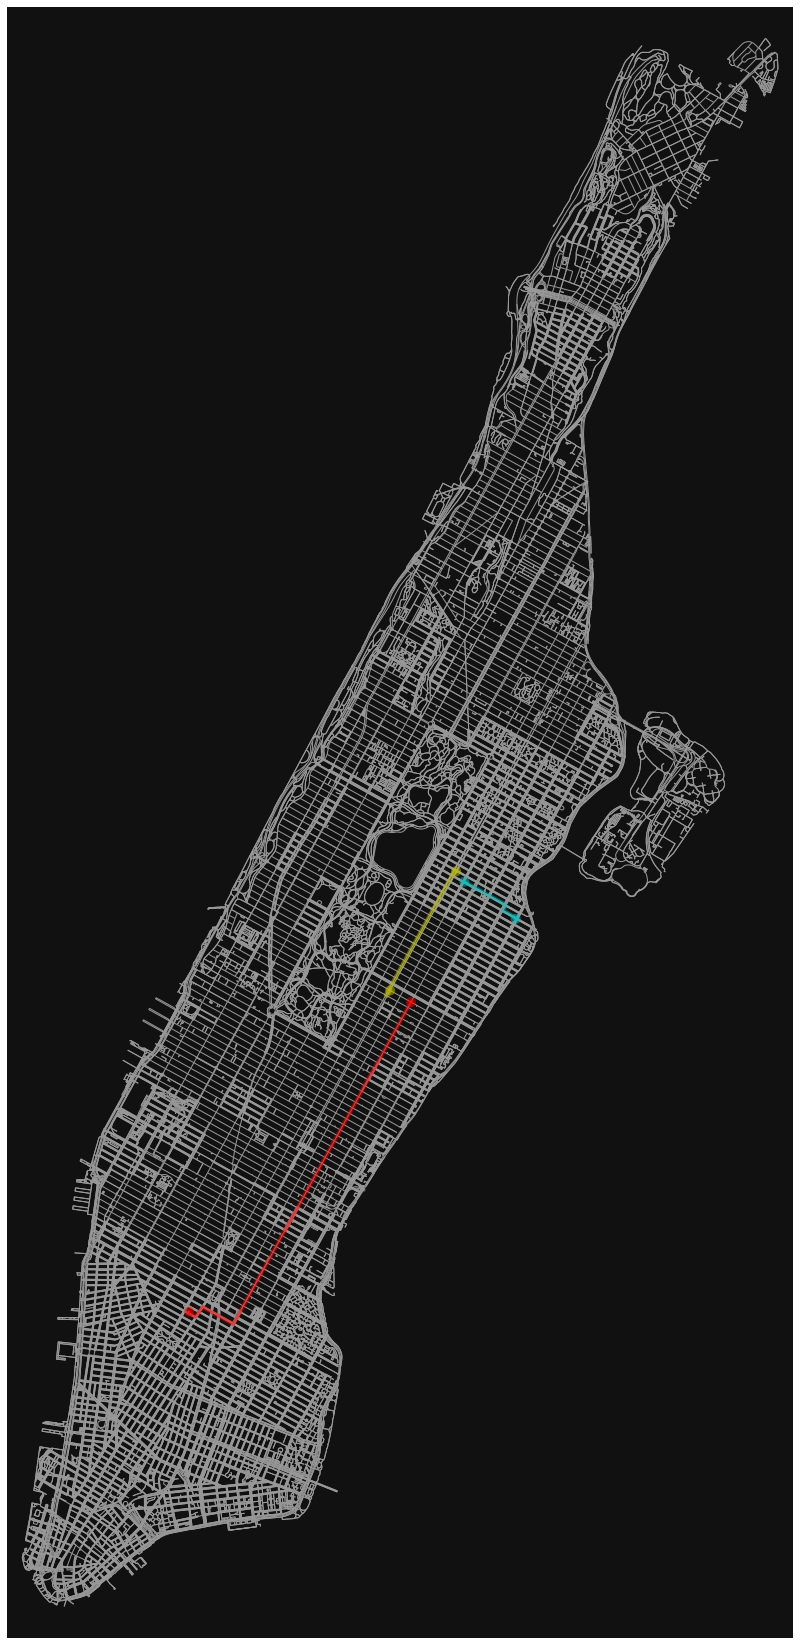

In [150]:
rc = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G_oms, routes_3, route_colors=rc, figsize=(30, 30), route_linewidth=6, node_size=0)

In [153]:
train.sort_values('pickup_datetime')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
96469,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.981743,40.719158,-73.938828,40.829182,N,849
223872,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.985085,40.747166,-73.958038,40.717491,N,1294
713067,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.965279,40.801041,-73.947479,40.815170,N,408
652463,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.982292,40.751331,-73.991341,40.750340,N,280
722901,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.970108,40.759800,-73.989357,40.742989,N,736
...,...,...,...,...,...,...,...,...,...,...,...
853710,id1255468,2,2016-06-30 23:58:52,2016-07-01 00:06:44,1,-73.982750,40.745289,-73.969002,40.757950,N,472
419031,id2013516,1,2016-06-30 23:59:09,2016-07-01 00:11:43,2,-73.955109,40.689564,-73.978203,40.685802,N,754
1008720,id0376262,1,2016-06-30 23:59:10,2016-07-01 00:41:36,2,-73.873093,40.774097,-73.926704,40.856739,N,2546
405743,id2332349,2,2016-06-30 23:59:37,2016-07-01 00:23:39,5,-73.998291,40.722618,-73.971779,40.762470,N,1442


In [154]:
train[train['passenger_count'] <= 2]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [158]:
desired_cols = ['pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']

train = train[train['passenger_count'] <= 2]
train = train[desired_cols]

KeyError: 'passenger_count'